In [1]:
sc.list_packages()
sc.install_pypi_package("pandas==1.2.2")
sc.install_pypi_package("matplotlib==3.1.1", "https://pypi.org/simple")
sc.install_pypi_package("seaborn", "https://pypi.org/simple")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
11,application_1649745410681_0012,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

absl-py (0.12.0)
astor (0.8.0)
astunparse (1.6.3)
aws-cfn-bootstrap (2.0)
beautifulsoup4 (4.9.3)
bleach (3.3.0)
boto (2.49.0)
cachetools (4.1.1)
certifi (2020.12.5)
chardet (4.0.0)
click (7.1.2)
cryptography (3.2.1)
cycler (0.11.0)
docutils (0.14)
flatbuffers (1.12)
funcsigs (1.0.2)
gast (0.4.0)
google-auth (1.23.0)
google-auth-oauthlib (0.4.2)
google-pasta (0.2.0)
grpcio (1.36.1)
h5py (2.10.0)
html5lib (1.1)
idna (2.10)
importlib-metadata (2.0.0)
jmespath (0.10.0)
joblib (1.0.1)
Keras-Applications (1.0.8)
Keras-Preprocessing (1.1.2)
kiwisolver (1.4.2)
lockfile (0.11.0)
lxml (4.6.2)
Markdown (3.3.4)
matplotlib (3.1.1)
mysqlclient (1.4.2)
nltk (3.5)
nose (1.3.4)
numpy (1.21.5)
oauthlib (3.1.0)
opt-einsum (2.3.2)
packaging (20.9)
pandas (1.2.2)
patsy (0.5.2)
pip (9.0.1)
protobuf (3.15.6)
py-dateutil (2.2)
pyasn1 (0.4.8)
pyasn1-modules (0.2.8)
pyparsing (3.0.8)
pystache (0.5.4)
python-daemon (2.2.3)
python-dateutil (2.8.2)
python37-sagemaker-pyspark (1.4.1)
pytz (2021.1)
PyYAML (5.4.1)
re

# Importing Necessary Libraries

In [2]:
from pyspark.sql.functions import when, count, col
import pyspark.sql.functions as F
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Load Data into Dataframe

In [3]:
df = spark.read.format("parquet")\
    .option("header","true")\
    .option("inferschema","true")\
    .load("s3://group23project/data_cleaning/")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

**Output from printSchema()**

In [4]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- FL_DATE: string (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: integer (nullable = true)
 |-- WHEELS_ON: integer (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: integer (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- WEEKDAY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- FLIGHT_STATUS: integer (nullable = true)

# Columns Summary

- FL_DATE = Date of the Flight
- OP_CARRIER = Airline Identifier
- OP_CARRIER_FL_NUM = Flight Number
- ORIGIN = Starting Airport Code
- DEST = Destination Airport Code
- CRS_DEP_TIME = Planned Departure Time
- DEP_TIME = Actual Departure Time
- DEP_DELAY = Total Delay on Departure in minutes
- TAXI_OUT = The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF = The time point that the aircraft's wheels leave the ground
- WHEELS_ON = The time point that the aircraft'ss wheels touch on the ground
- TAXI_IN = The time duration elapsed between wheels-on and gate arrival at the destination airport
- CRS_ARR_TIME = Planned arrival time
- ARR_TIME = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL
- ARR_DELAY = Total Delay on Arrival in minutes
- CANCELLED = Flight Cancelled (1 = cancelled)
- CANCELLATION_CODE = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

# Impact of Delays (Departure Delay vs. Arrival Delay)

In this visualization what We will try to do is analyze both, the departure and the arrival delay. We want to see which one of both has a bigger impact on the plane being late overall.

If the departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip.

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. 

In order to do this, We will use a different type of plot, where We will overlay the ARR_DELAY over the DEP_DELAY and see how they look.


In [5]:
dep_df=df.groupBy('OP_CARRIER').agg(F.mean("DEP_DELAY"))
arr_df=df.groupBy('OP_CARRIER').agg(F.mean("ARR_DELAY"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
dep_df=dep_df.toPandas()
arr_df=arr_df.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

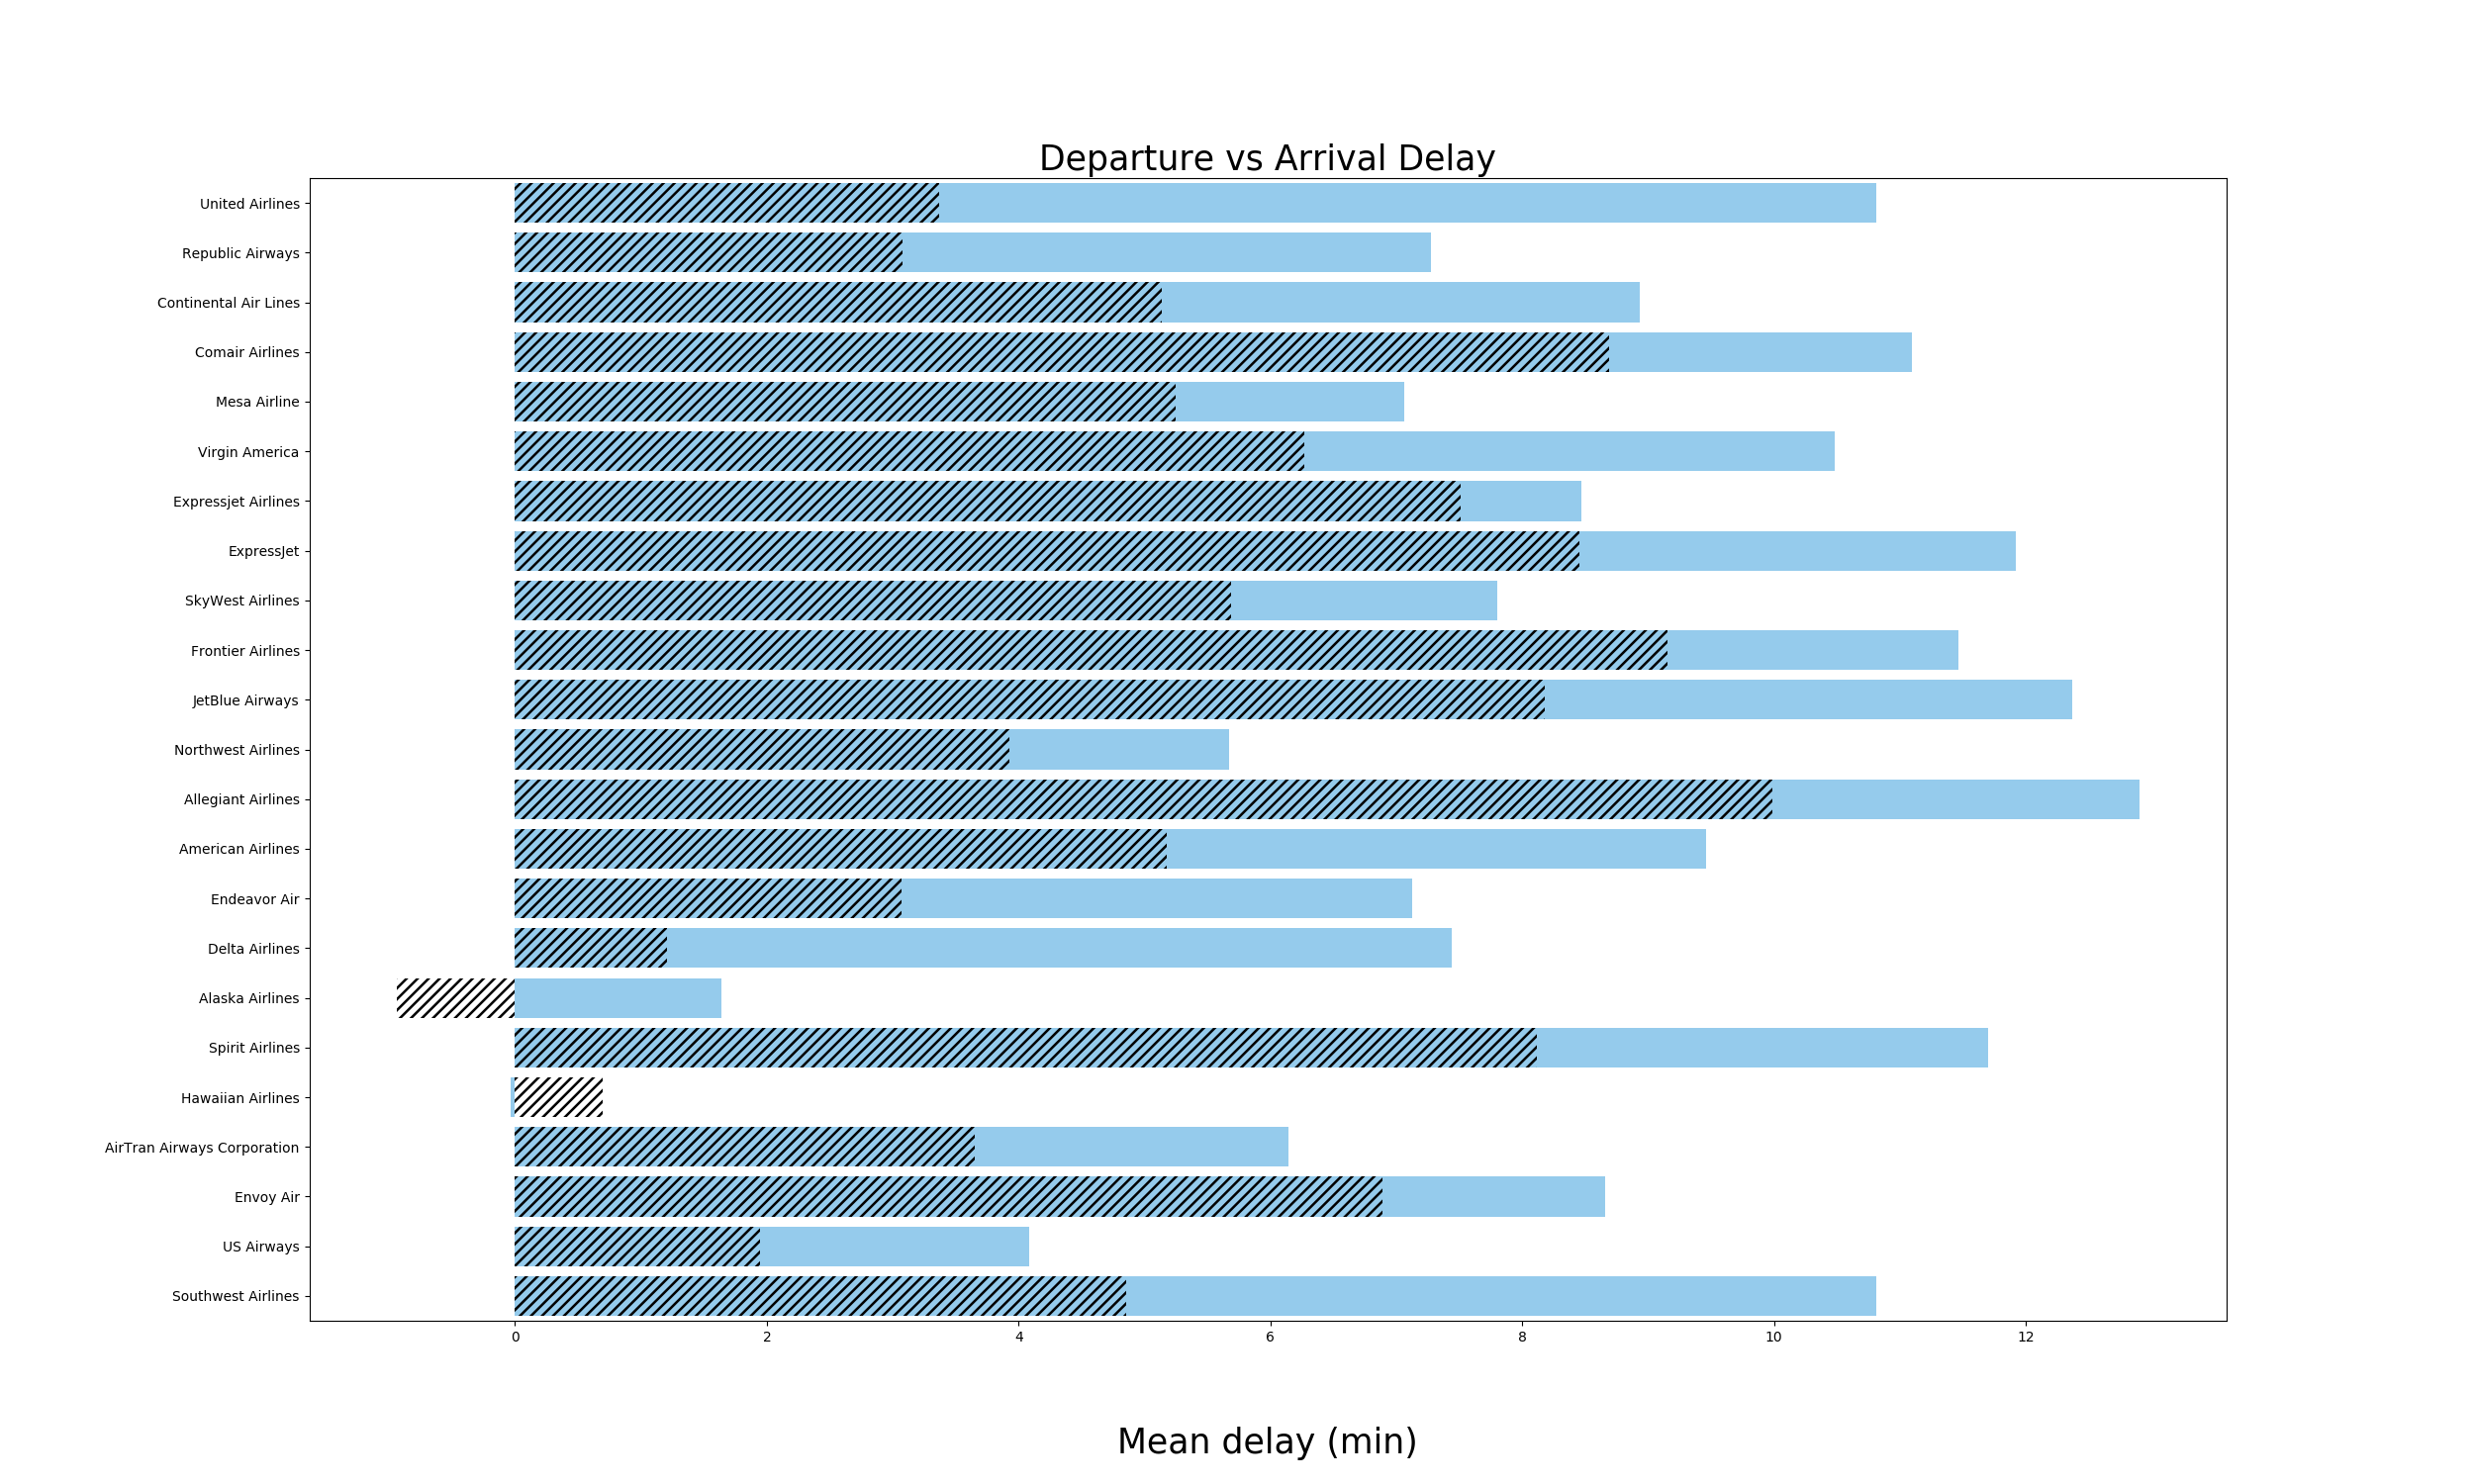

In [7]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8 

fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="avg(DEP_DELAY)", y="OP_CARRIER", data=dep_df, color="lightskyblue", ci=None)
ax = sns.barplot(x="avg(ARR_DELAY)", y="OP_CARRIER", data=arr_df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay',fontsize=25)
plt.xlabel('Mean delay (min)', fontsize=25, labelpad=60);

%matplot plt

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

Another interesting information is related to Delta Airlines. The arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average.

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

# The Most Common Airports/Most Crowded Airports.

**The USA's busiest airports by aircraft movements are measured by total movements.A movement is a WheelsOn or Wheelsoff of an aircraft.**
This will gives the idea about which airports are usually busy with flights and mostly used.

In [8]:
import pyspark.sql.functions as F 
df_fp = df.groupBy("ORIGIN").agg(F.sum("WHEELS_OFF")).orderBy(col("sum(WHEELS_OFF)").desc()).limit(25).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df_fp=df_f.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
name 'df_f' is not defined
Traceback (most recent call last):
NameError: name 'df_f' is not defined



In [10]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
df_fp.plot.bar()
plt.title('The Most Crowded/Busy Airports', fontsize=20)
plt.xlabel('AIRPORTS', fontsize=16)
plt.ylabel('FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
import numpy as np
xpos = np.arange(len(df_fp.DEST))
plt.xticks(xpos,df_fp['DEST'],rotation = 90)
plt.show();
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
'DataFrame' object has no attribute 'DEST'
Traceback (most recent call last):
  File "/usr/local/lib64/python3.7/site-packages/pandas/core/generic.py", line 5462, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'DataFrame' object has no attribute 'DEST'



# No of destination by Airline(selected Airline shown in orange colour)

In [11]:
cities=df.groupBy("OP_CARRIER","DEST").count()
cities_1=cities.select("OP_CARRIER").toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
cities_airline = cities_1.OP_CARRIER.value_counts().rename_axis('OP_CARRIER').reset_index(name='NUMBER_CITIES')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

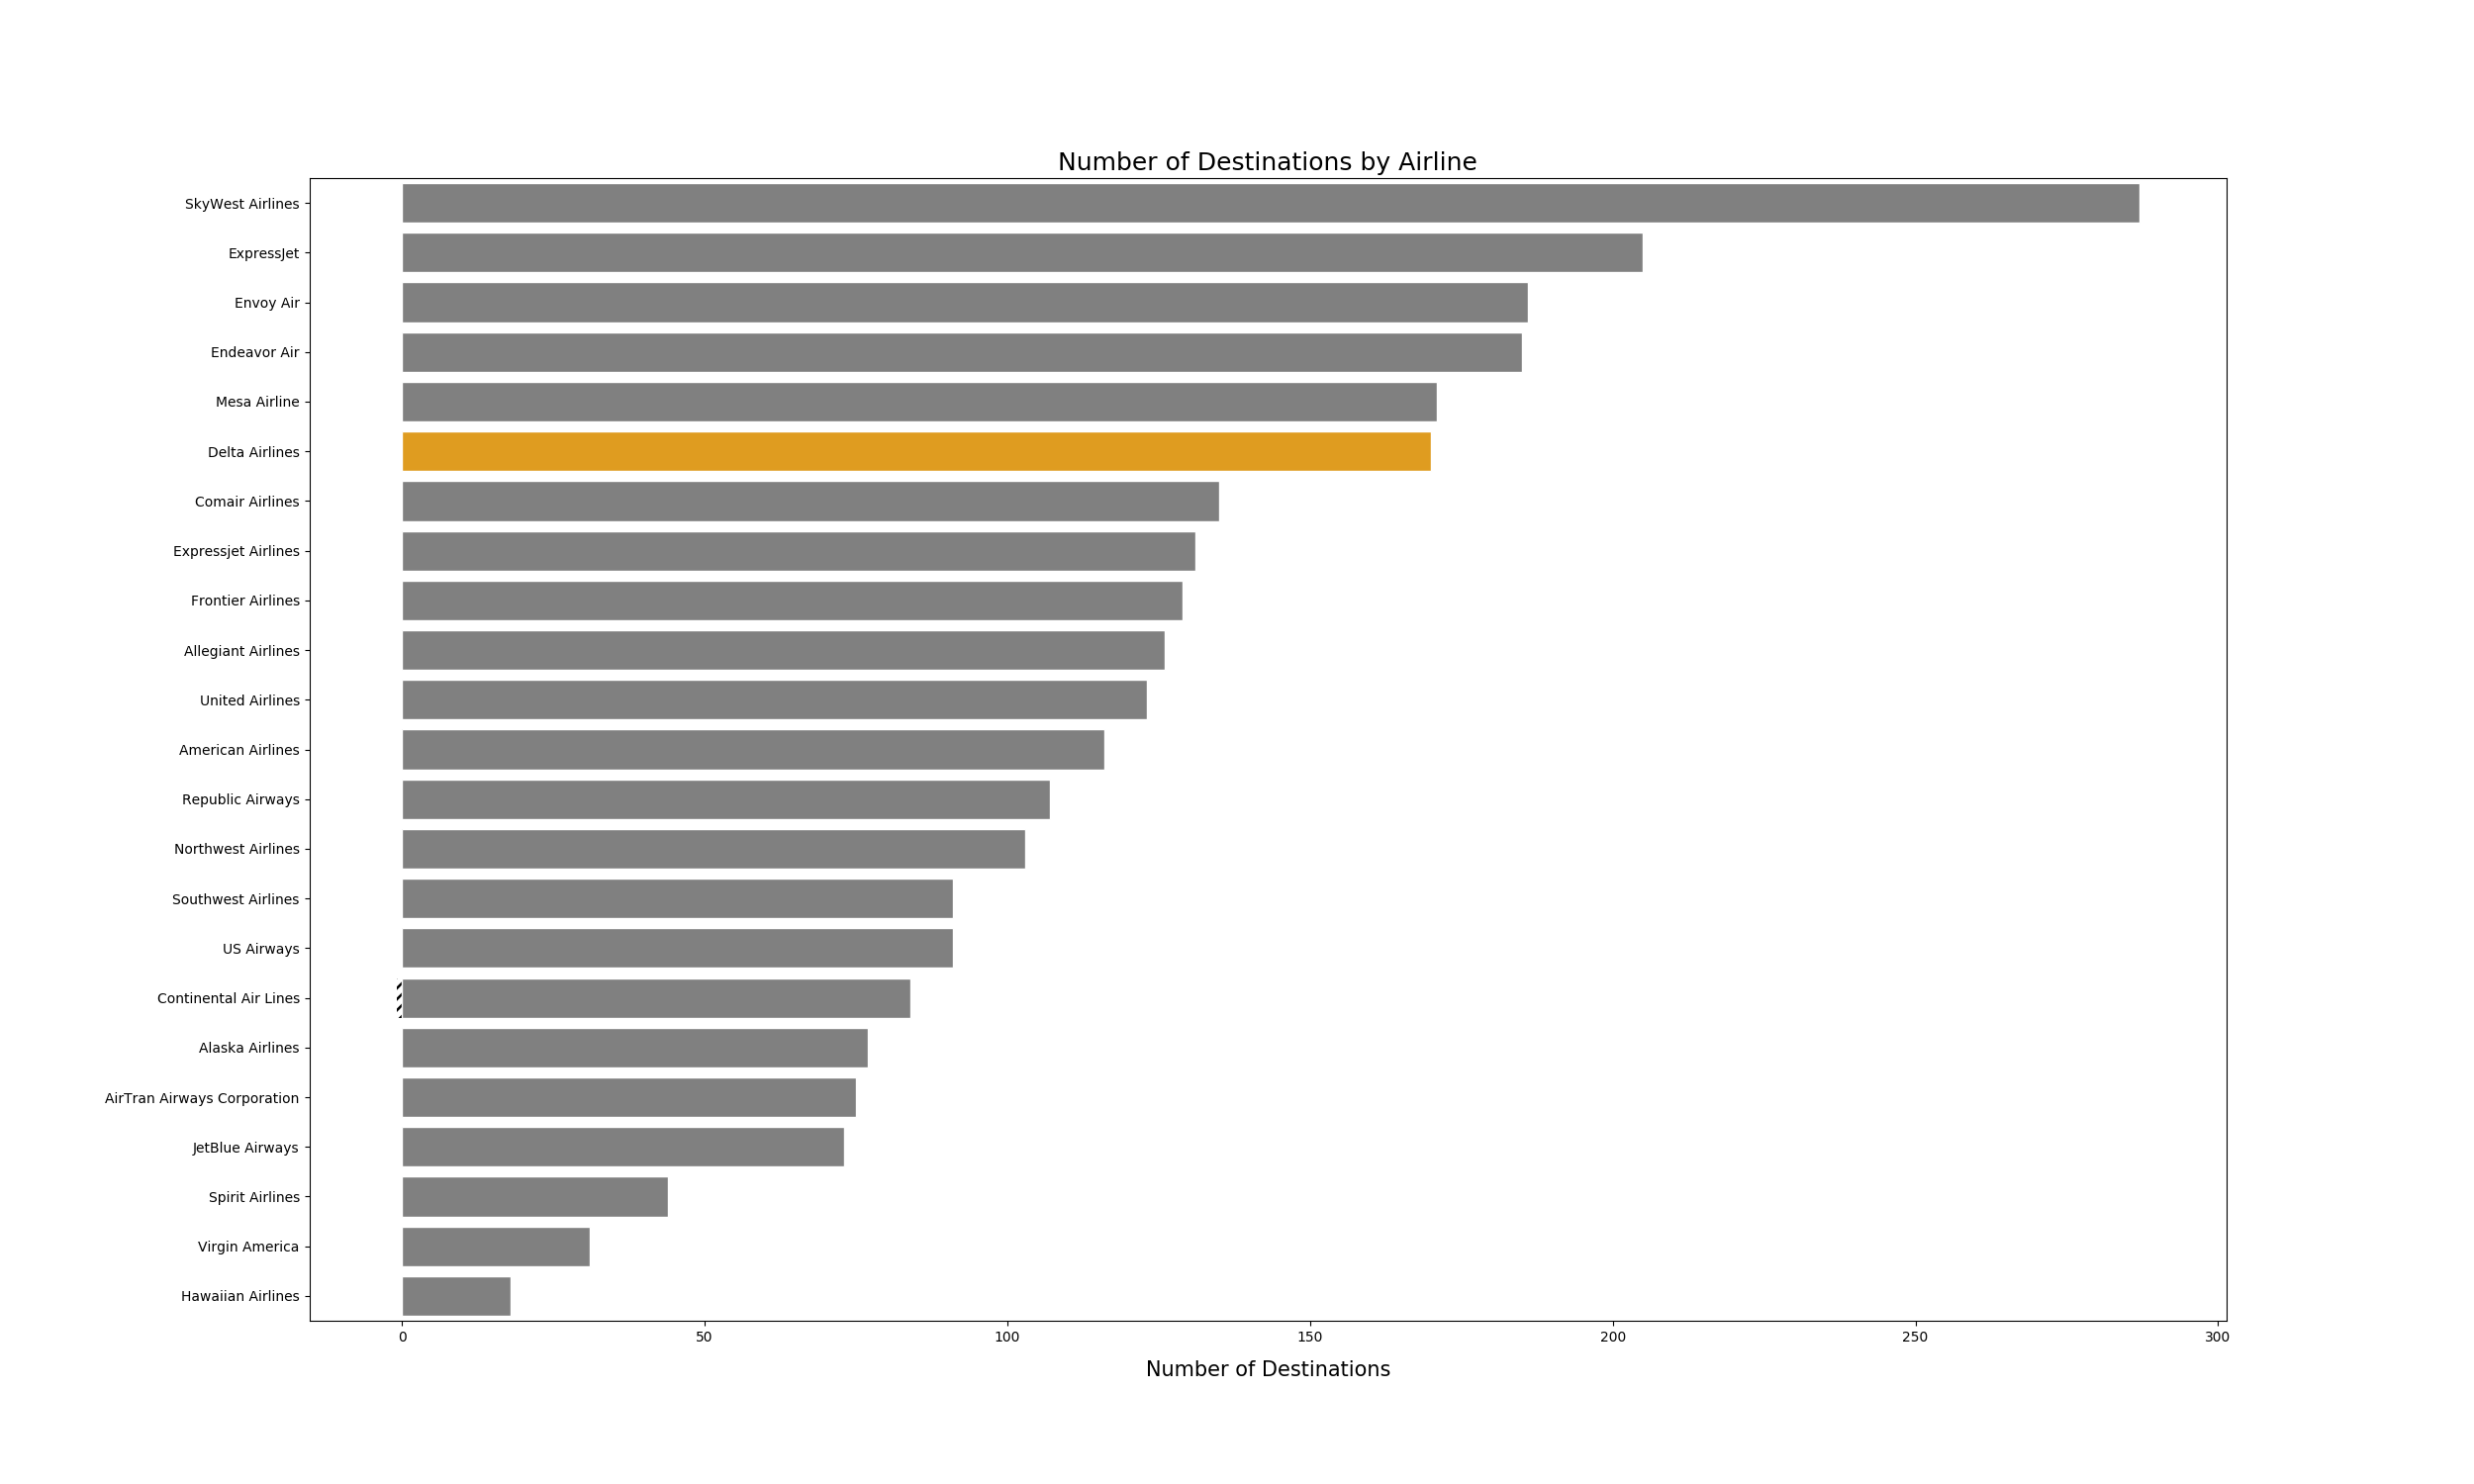

In [13]:
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="NUMBER_CITIES", y="OP_CARRIER", data=cities_airline, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Number of Destinations by Airline', fontsize=18)
plt.xlabel('Number of Destinations', fontsize=15, labelpad=12);
plt.show();

%matplot plt

# Difference between arrival and departure delay.

In [14]:
df=df.withColumn('ARR-DEP_DELAY', col("ARR_DELAY")-col("DEP_DELAY"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
arr_dep_df = df.groupBy('OP_CARRIER').agg(F.sum("ARR-DEP_DELAY")).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

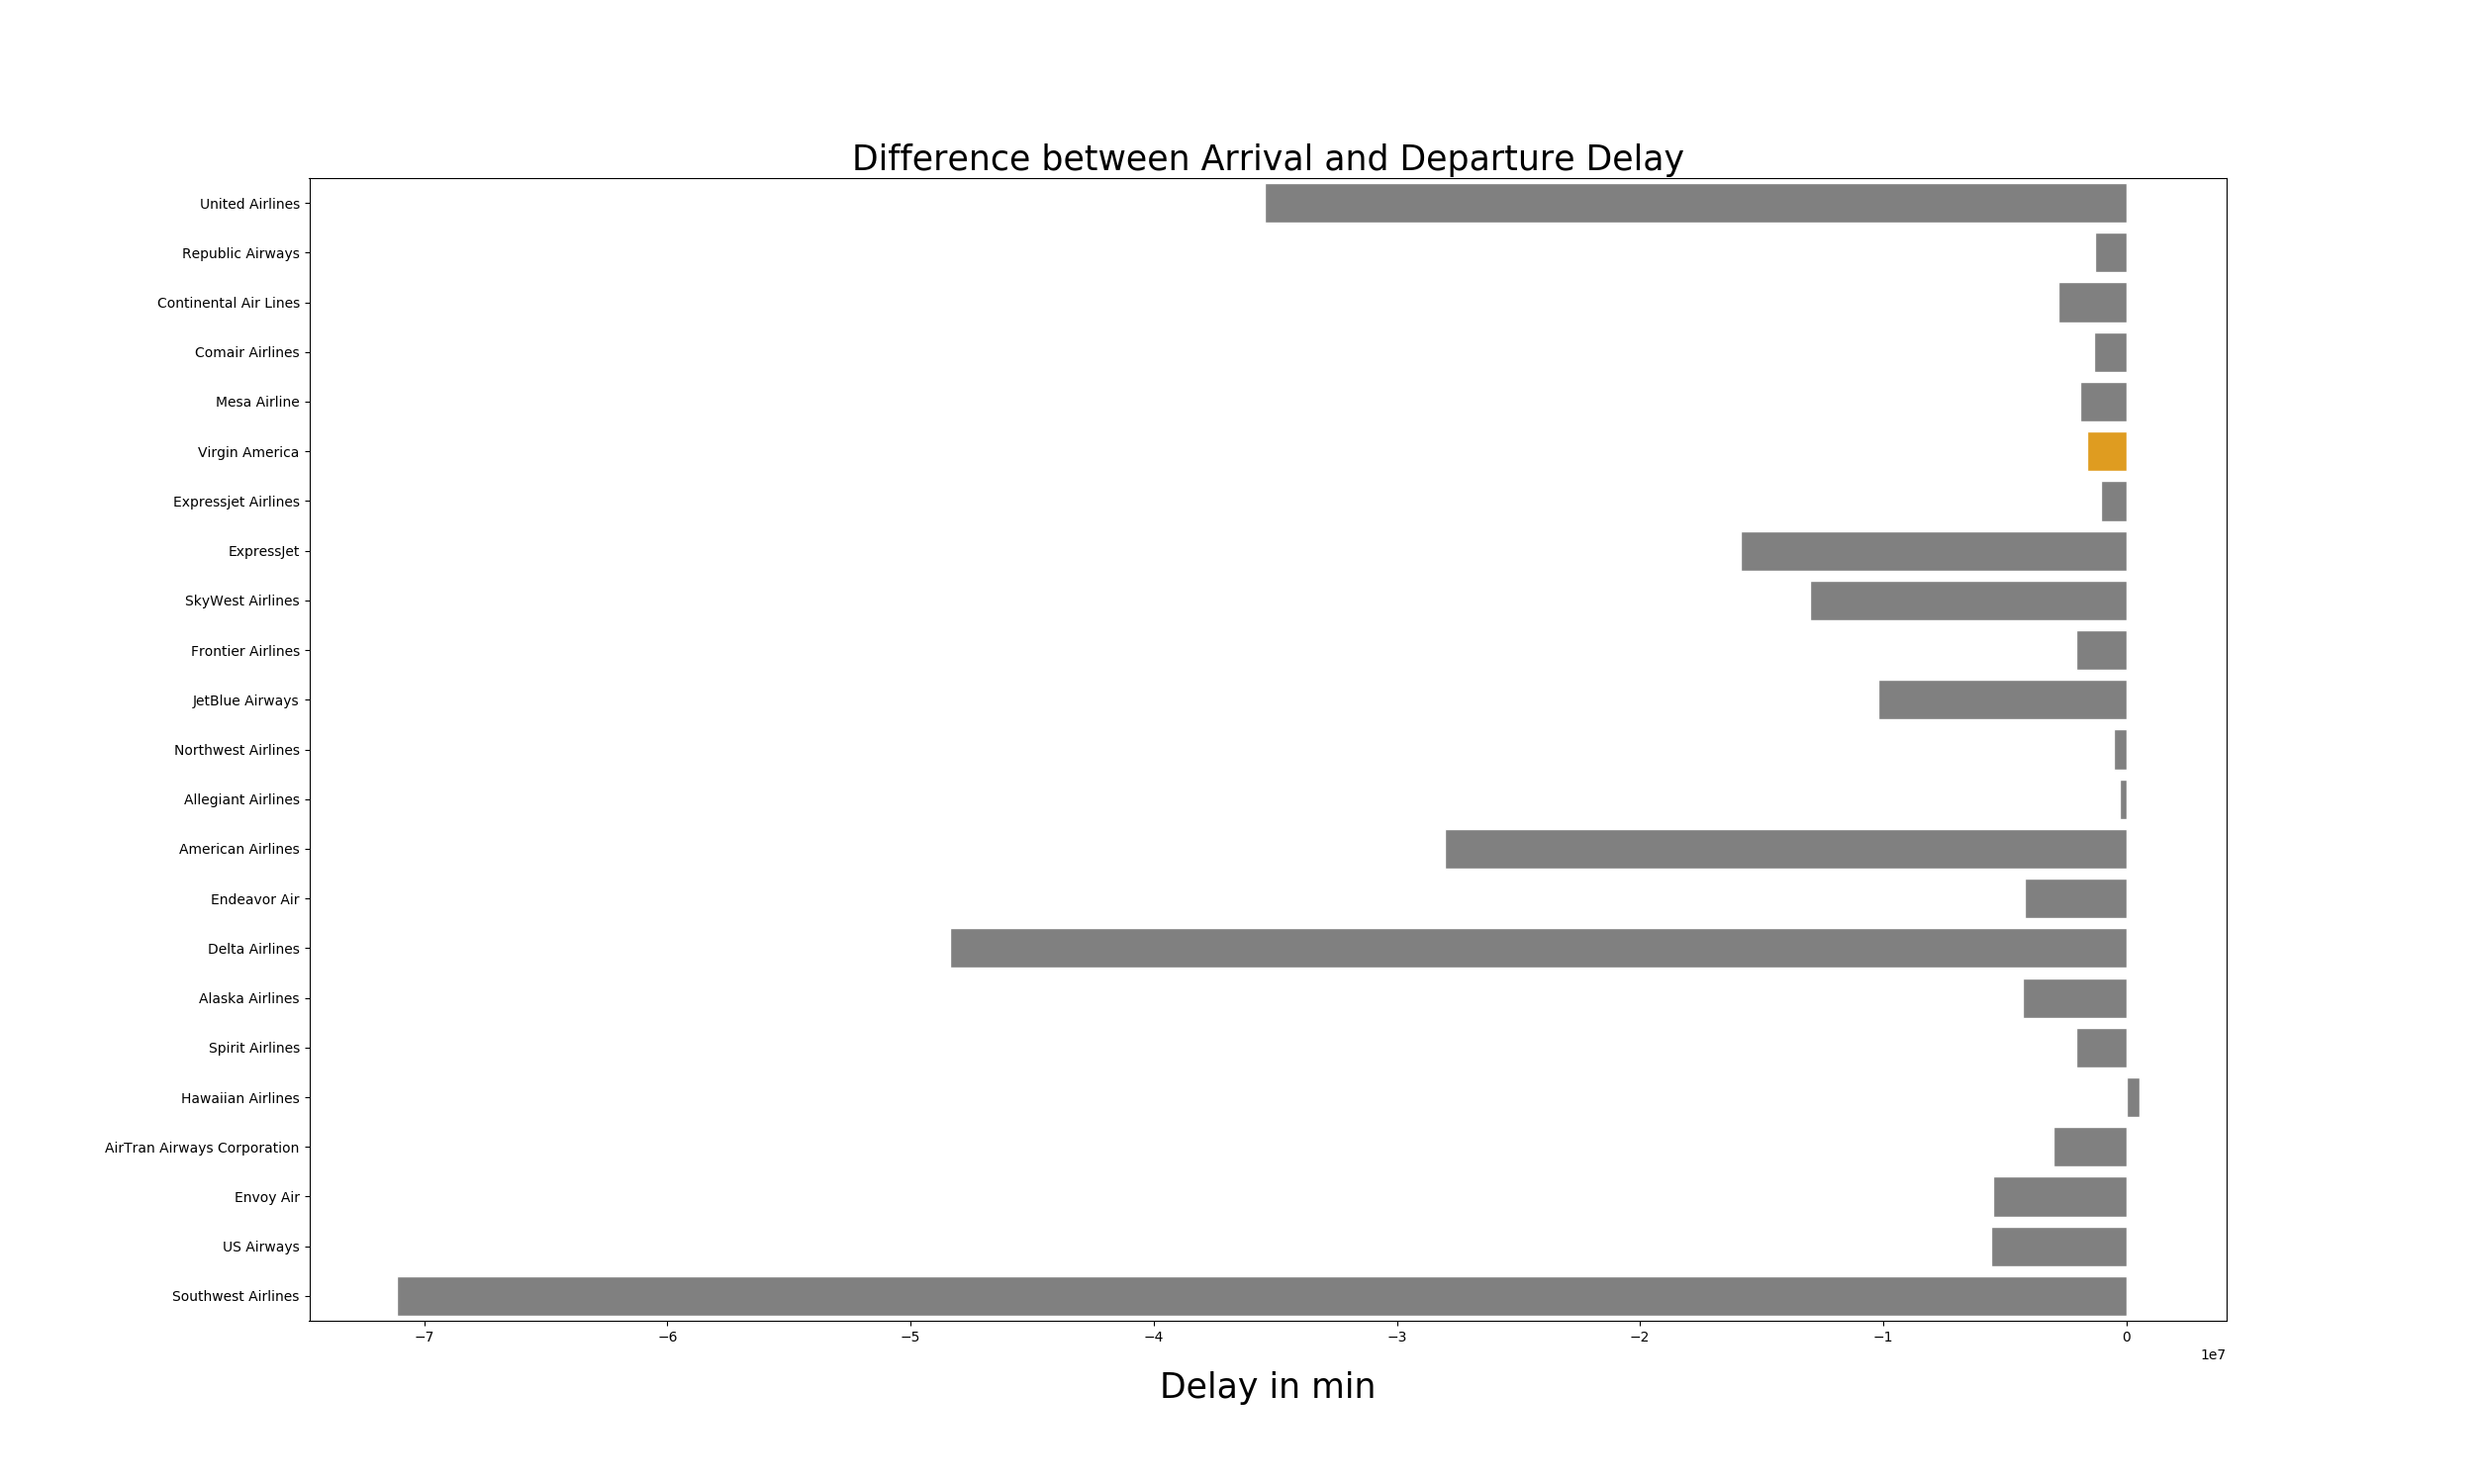

In [16]:
sns.set_style('darkgrid')
fig = plt.figure(1, figsize=(25,15))
ax = sns.barplot(x="sum(ARR-DEP_DELAY)", y="OP_CARRIER", data=arr_dep_df, palette=["grey" if y!='Delta Airlines' else "orange" for y in cities_airline.OP_CARRIER])
plt.title('Difference between Arrival and Departure Delay', fontsize=25)
plt.xlabel('Delay in min', fontsize=25, labelpad=20);
plt.show();
%matplot plt

According to this data the months with the most delayed flights are July, August, June and May, so basically the summer months. These are followed to November, December and October, which are the end of year including Christmas. The best months to travel are February, January and September, clearly after the standard holidays (summer and Christmas).

# Most Popular Destination with Average Arrival Delays

In [17]:
Avg_Arr_Delay_Dest= df.groupBy('DEST').agg(F.mean("ARR_DELAY")).orderBy(col("avg(ARR_DELAY)").desc()).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
Dest_Flights=df.groupBy('DEST').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
Merged_Df= pd.merge(Dest_Flights, Avg_Arr_Delay_Dest, on='DEST')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
Top_Avg_Arr_Delay_Dest=Merged_Df.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
Merged_Df = Merged_Df.set_index('DEST')
xpos = np.arange(len(Merged_Df.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

Dest_Flights.plot(kind='bar',color='grey',ax=ax, width=width, position=0)
Top_Avg_Arr_Delay_Dest.plot(kind='bar',color='red', ax=ax2, width=width, position=1)

plt.hlines(y=4.90, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS vs AVERAGE ARRIVAL DELAY', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE ARRIVAL DELAY (mins)')
ax.set_xlabel('DESTINATION CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df.index,rotation = 90)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

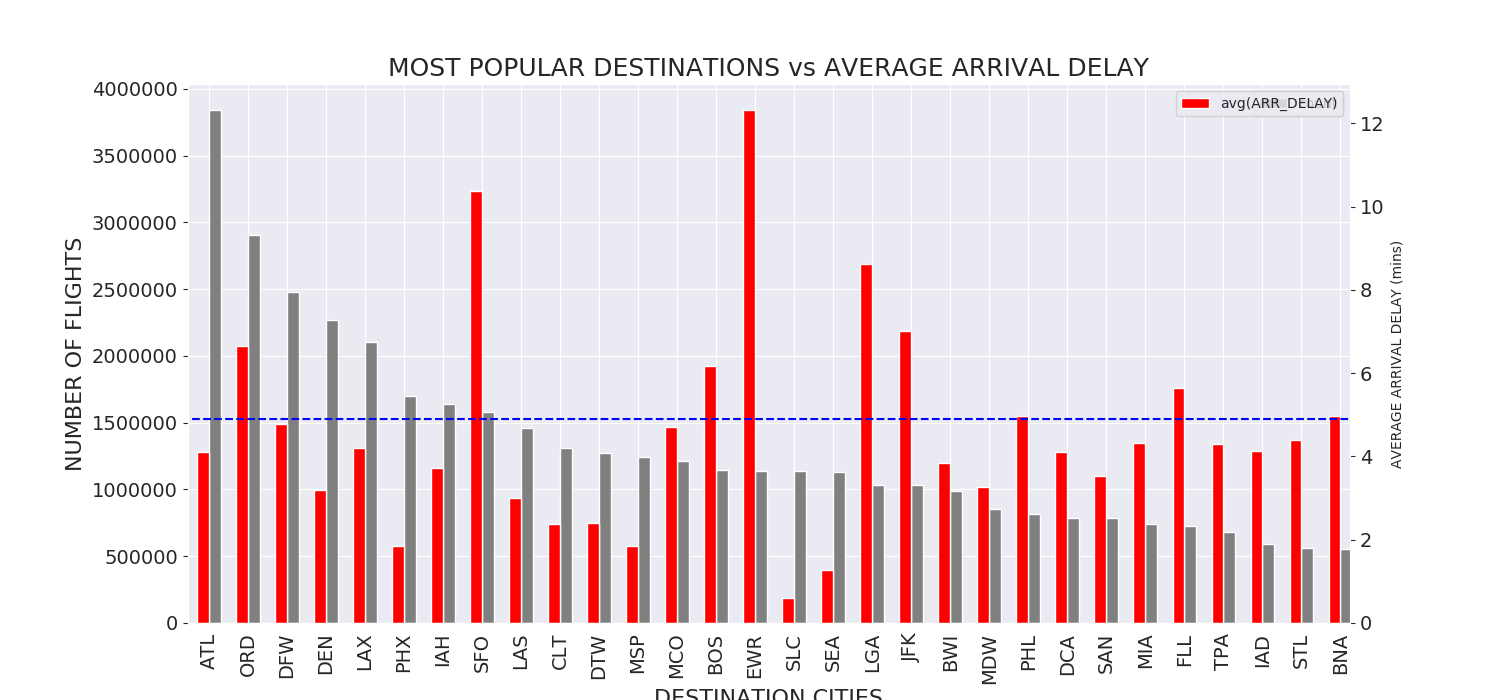

In [22]:
%matplot plt

In this plot the red indicated Arrival delay while grey is number of Landings.
The dashed line that we see on the plot corresponds to the average delay on arrival of the top 30 destinations. It is interesting to see how Atlanta, having such a high the number of landings, has a very low average delay with just over 2 minutes, whereas Newark, a not so popular destination, has such a high minute average delay. San Francisco is another destination that stands out with a high average delay as well as Orlando and Boston.

# Departure Cities with the most Delayed Departure Flights

In [23]:
Avg_Dep_Delay_Origin= df.groupBy('ORIGIN').agg(F.mean("DEP_DELAY")).orderBy(col("avg(DEP_DELAY)").desc()).toPandas()
Origin_Flights=df.groupBy('ORIGIN').count().orderBy(col('count').desc()).limit(30).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
Merged_Df2= pd.merge(Origin_Flights, Avg_Dep_Delay_Origin, on='ORIGIN')
Top_Avg_Dep_Delay_Origin=Merged_Df2.drop('count',axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

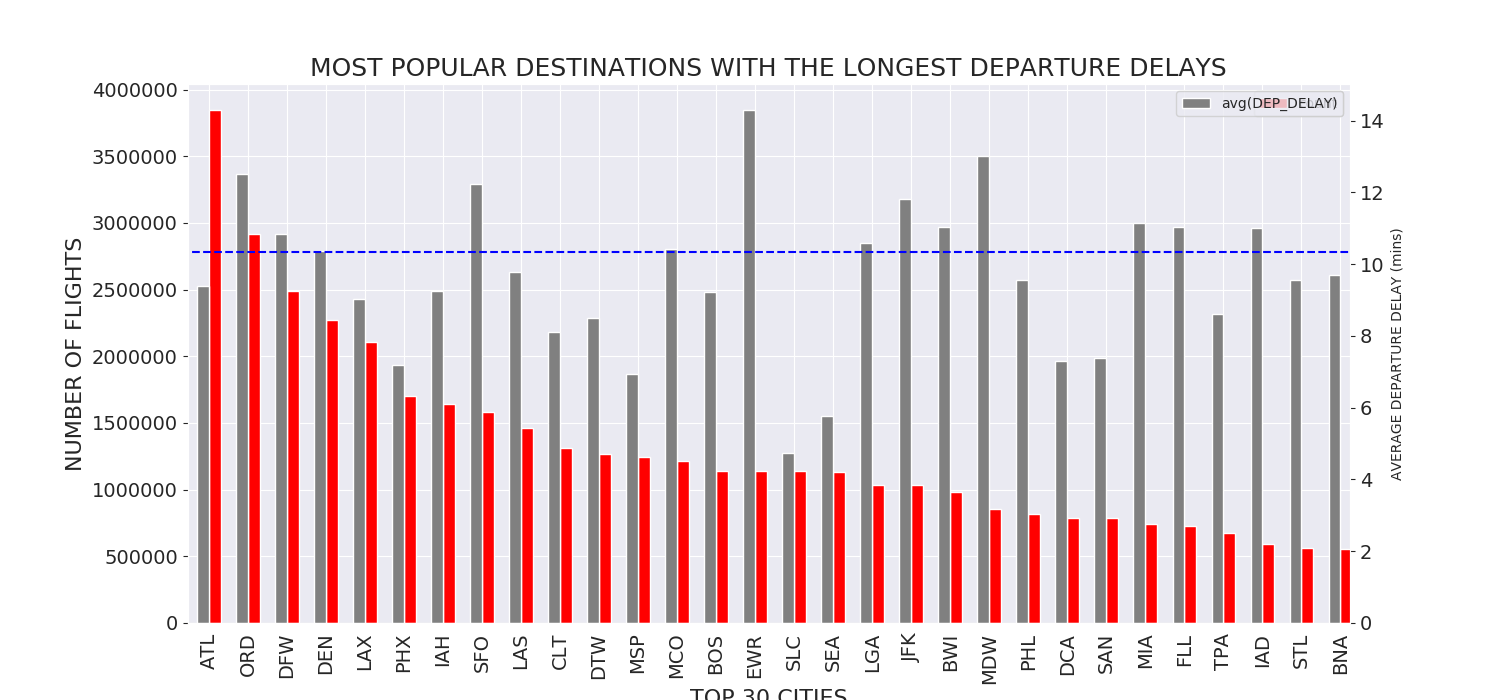

In [25]:
Merged_Df2 = Merged_Df2.set_index('ORIGIN')
xpos = np.arange(len(Merged_Df2.index))
fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

Origin_Flights.plot(kind='bar',color='red',ax=ax, width=width, position=0)
Top_Avg_Dep_Delay_Origin.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR DESTINATIONS WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.xticks(xpos,Merged_Df2.index,rotation = 90)
plt.show()

%matplot plt


In this plot the red indicated no of flights while grey is  Dep. delay.